## Memristor Simulation using Biolek Model

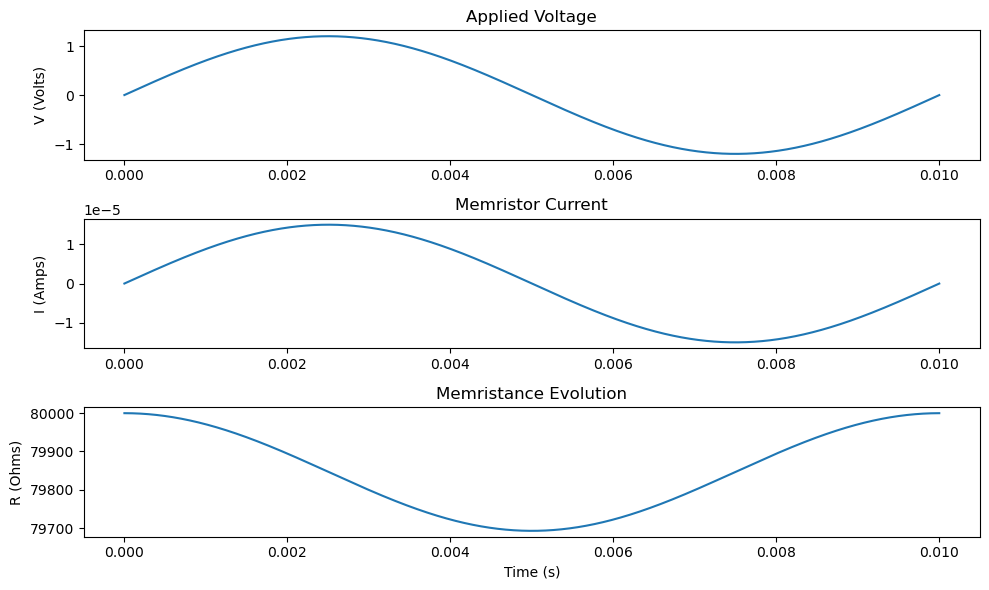

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Ron = 1e3        # Ohms
Roff = 100e3     # Ohms
Rinit = 80e3     # Initial resistance
D = 10e-9        # Width of TiO2 layer (m)
uv = 10e-15      # Dopant mobility (m^2/V/s)
p = 1            # Window function exponent

# Time parameters
t_max = 0.01     # seconds
dt = 1e-6
time = np.arange(0, t_max, dt)

# Voltage input: sinusoidal
V = 1.2 * np.sin(2 * np.pi * 100 * time)

# Initialize state variables
x = np.zeros_like(time)
x[0] = (Roff - Rinit) / (Roff - Ron)  # Initial x from Rinit
R = np.zeros_like(time)
I = np.zeros_like(time)

# Joglekar window function
def f(x, p):
    return 1 - (2 * x - 1)**(2 * p)

# Simulation loop
for t in range(1, len(time)):
    R[t-1] = Ron * x[t-1] + Roff * (1 - x[t-1])
    I[t-1] = V[t-1] / R[t-1]
    dx = uv * Ron / D**2 * I[t-1] * f(x[t-1], p)
    x[t] = x[t-1] + dx * dt
    x[t] = np.clip(x[t], 0, 1)  # Clamp between 0 and 1

# Final value
R[-1] = Ron * x[-1] + Roff * (1 - x[-1])
I[-1] = V[-1] / R[-1]

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time, V)
plt.title("Applied Voltage")
plt.ylabel("V (Volts)")

plt.subplot(3, 1, 2)
plt.plot(time, I)
plt.title("Memristor Current")
plt.ylabel("I (Amps)")

plt.subplot(3, 1, 3)
plt.plot(time, R)
plt.title("Memristance Evolution")
plt.ylabel("R (Ohms)")
plt.xlabel("Time (s)")

plt.tight_layout()
plt.show()

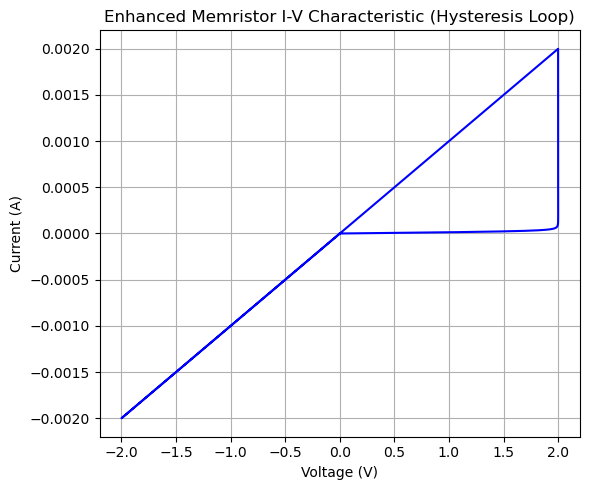

In [4]:
# Memristor parameters
Ron = 1e3        # ON-state resistance (Ohms)
Roff = 100e3     # OFF-state resistance (Ohms)
Rinit = 80e3     # Initial resistance (Ohms)
D = 10e-9        # Width of TiO2 layer (m)
uv = 10e-15      # Dopant mobility (m^2/V/s)
p = 10           # Window function exponent (higher = more nonlinear)

# Time setup
t_max = 1.0      # Simulation duration in seconds
dt = 1e-4        # Time step
time = np.arange(0, t_max, dt)

# Sinusoidal voltage input (1 Hz, 2V amplitude)
V = 2.0 * np.sin(2 * np.pi * 1 * time)

# Initialize variables
x = np.zeros_like(time)                          # Normalized width of doped region
x[0] = (Roff - Rinit) / (Roff - Ron)             # Derived from Rinit
R = np.zeros_like(time)                          # Memristance over time
I = np.zeros_like(time)                          # Current over time

# Joglekar window function
def f(x, p):
    return 1 - (2 * x - 1)**(2 * p)

# Simulation loop
for t in range(1, len(time)):
    R[t-1] = Ron * x[t-1] + Roff * (1 - x[t-1])
    I[t-1] = V[t-1] / R[t-1]
    dx = uv * Ron / D**2 * I[t-1] * f(x[t-1], p)
    x[t] = x[t-1] + dx * dt
    x[t] = np.clip(x[t], 0, 1)  # Bound x between [0, 1]

# Final values
R[-1] = Ron * x[-1] + Roff * (1 - x[-1])
I[-1] = V[-1] / R[-1]

# Plot I-V hysteresis loop
plt.figure(figsize=(6, 5))
plt.plot(V, I, color='blue')
plt.title("Enhanced Memristor I-V Characteristic (Hysteresis Loop)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.grid(True)
plt.tight_layout()
plt.show()
